In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

from collections import Counter
from nltk import word_tokenize

In [2]:
df = pd.read_csv('../data/processed/spam_v3.csv')

In [3]:
df

,target,text,num_chars,text_clean,num_chars_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final...,118
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i do think he go to usf he life around her...,54
...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,this is the time we have tried contact u hav...,106
5165,0,Will Ì_ b going to esplanade fr home?,37,will b going to esplanade fr home,33
5166,0,"Pity, * was in mood for that. So...any other s...",57,pity wa in mood for that so any other suggestion,48
5167,0,The guy did some bitching but I acted like i'd...,125,the guy did some bitching but i acted like i b...,122


Spam Message

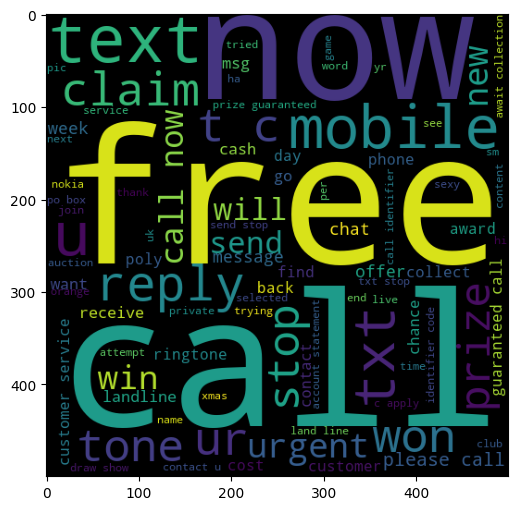

In [4]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc = wc.generate(df[df['target'] == 1]['text_clean'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Non-spam Message

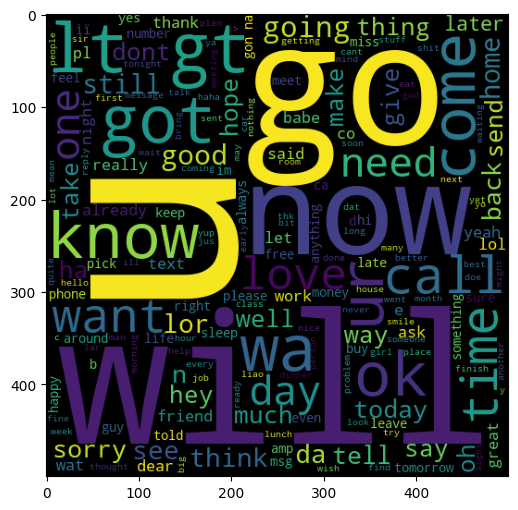

In [5]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')
spam_wc = wc.generate(df[df['target'] == 0]['text_clean'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

- The word cloud tells us which are the most frequently occured word for spam and non-spam messages. 
- We can also see the most occurred words for both spam and non-spam message in the form of bar chart as well. 

In [6]:
def corpus(df, target):
    corpus = [word for text in df[df['target'] == target]['text_clean'].tolist() for word in str(text).split()]
    return corpus                

In [7]:
non_spam_corpus = corpus(df, 0)
spam_corpus = corpus(df, 1)

In [8]:
len(spam_corpus)

12678

In [9]:
len(non_spam_corpus)

61908

In [10]:
most_occurred_words_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_occurred_words_non_spam_corpus = pd.DataFrame(Counter(non_spam_corpus).most_common(30))

In [11]:
most_occurred_words_spam_corpus.rename(columns={0: 'word', 1: 'count'}, inplace=True)
most_occurred_words_non_spam_corpus.rename(columns={0: 'word', 1: 'count'}, inplace=True)

In [12]:
fig = px.bar(most_occurred_words_spam_corpus, x='word', y='count', color='word', title='30 most frequent words for spam messages')
fig.show()

In [13]:
fig = px.bar(most_occurred_words_non_spam_corpus, x='word', y='count', color='word', title='30 most frequent words for non-spam messages')
fig.show()

- There are stopwords which doesn't contribute much to the context of the sentence occurred very frequently. 
- If we use the stopwords collection from a library, then we might remove words that contributes the context of the sentence. 
- Therefore, we will create our custom stopwords list that is to be removed from the text.

In [14]:
def remove_custom_stopwords(text):
    stop_words = ['a', 'the']
    text = str(text).lower()
    text = word_tokenize(text)
    return ' '.join([str(i) for i in text if i not in stop_words])

In [15]:
df['text_clean'] = df['text_clean'].apply(remove_custom_stopwords)
df['num_chars_clean'] = df['text_clean'].apply(len)

In [16]:
df

,target,text,num_chars,text_clean,num_chars_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...,102
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni,23
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in wkly comp to win fa cup final tk...,112
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say,43
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah i do think he go to usf he life around her...,54
...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,this is time we have tried contact u have won ...,92
5165,0,Will Ì_ b going to esplanade fr home?,37,will b going to esplanade fr home,33
5166,0,"Pity, * was in mood for that. So...any other s...",57,pity wa in mood for that so any other suggestion,48
5167,0,The guy did some bitching but I acted like i'd...,125,guy did some bitching but i acted like i be in...,118


In [17]:
non_spam_corpus = corpus(df, 0)
spam_corpus = corpus(df, 1)

most_occurred_words_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_occurred_words_non_spam_corpus = pd.DataFrame(Counter(non_spam_corpus).most_common(30))

most_occurred_words_spam_corpus.rename(columns={0: 'word', 1: 'count'}, inplace=True)
most_occurred_words_non_spam_corpus.rename(columns={0: 'word', 1: 'count'}, inplace=True)

In [18]:
fig = px.bar(most_occurred_words_spam_corpus, x='word', y='count', color='word', title='30 most frequent words for spam messages')
fig.show()

In [19]:
fig = px.bar(most_occurred_words_non_spam_corpus, x='word', y='count', color='word', title='30 most frequent words for non-spam messages')
fig.show()

We can see that in spam messages, the words: call, free, mobile did not fall under first 30 most occurred words. These are the words that differentiates spam messages from non-spam messages and we also expect our model to learn it in this way.

In [21]:
df.to_csv('../data/processed/spam_v4.csv', index=False)